# Understanding mobility during social distancing

As countries around the world work to contain the spread and impact of COVID-19, the World Bank Group is moving quickly to [provide fast, flexible responses](https://www.worldbank.org/en/news/factsheet/2020/02/11/how-the-world-bank-group-is-helping-countries-with-covid-19-coronavirus) to help developing countries strengthen their pandemic response and health care systems.

Part of this response is supporting countries' lock-down policies and evaluating their impacts. As governments strive to prevent the spread of COVID-19, they are also trying to prevent disproportionate socioeconomic impact in vulnerable communities. 

Understanding mobility across different communities, how it's influenced by policies, and identifying early potential hot spots is crucial to governments as they monitor and lift lockdowns.

## Using private sector data to understand mobility

Private sector data is crucial in helping governments measure how their policies impact human movement within different communities. 

For example, in areas with a higher median income and a more formal workforce, social distancing measures will likely have a higher degree of adherence. 

However, areas with lower income and a more informal workforce will have a harder time following social distancing guidelines. 

Several studies of United States counties support this hypothesis:

| NYT | Reuters |
| :---: | :---: |
| ![](imgs/NYT.png) |![](imgs/Reuters.png)|
| [NYT](https://www.nytimes.com/interactive/2020/04/03/us/coronavirus-stay-home-rich-poor.html) with [Cuebiq](https://www.cuebiq.com/) data: Census tract median of intra-day max extent of devices. 10% and 90% wealth percentiles. Wealthy counties esentially halted all movement and worked from home, while poorest counties trailed almost a week later, and with significant residual mobility as people could not afford to stay home. |  [Reuters](https://graphics.reuters.com/HEALTH-CORONAVIRUS/USA/qmypmkmwpra/) and MIT. Wealthier counties had less mobility than poorer ones. |

## Available data

To monitor mobility, there are several publicly available options:
* [Google's publicly available aggregated mobility data](https://www.google.com/covid19/mobility/)
* [Apple's publicly available aggregated mobility data](https://www.apple.com/covid19/mobility)

In Addition, through the World Bank's [Data Partnership](https://datapartnership.org/) the World Bank has access to several other datasets: 
* [Cuebiq](https://cuebiq.com)
* [Unacast](https://unacast.com)
* [Xmode](https://xmode.io)
* [Veraset](https://Veraset.com)
* [Facebook](https://dataforgood.fb.com/)


In this notebook, we will explore what we can do with each of the public datasets and some of the [Data Partnership](https://datapartnership.org/) ones. However, not every dataset represents every population equally. 

Some datasets may over-represent higher-income populations, while others may skew towards lower-income groups. 

## Exploring publicly available data

In early April 2020, the [World Bank Group designated several countries to receive COVID-19 support](https://www.worldbank.org/en/news/press-release/2020/04/02/world-bank-group-launches-first-operations-for-covid-19-coronavirus-emergency-health-support-strengthening-developing-country-responses). This list has since [expanded](https://www.worldbank.org/en/about/what-we-do/brief/world-bank-group-operational-response-covid-19-coronavirus-projects-list).  

We will focus on India, one of the countries receiving COVID-19 support.  However, this will work for any country where data is available. 


Let's start with exploring public mobility data from [Apple](https://www.apple.com/covid19/mobility) and [Google](https://www.google.com/covid19/mobility/). 

In [1]:
# Import libraries, and designate where we keep our data folder.
import os
from pathlib import Path
from glob import glob
import pandas as pd

folder=Path("data/mobility")

### Apple mobility data

In [2]:
# Read our downloaded Apple Data
apple_data=[p for p in folder.rglob('apple*.csv')]
apple_mov=pd.read_csv(apple_data[-1])

# Filter to include India
apple_mov=apple_mov[apple_mov['region']=='India']

# Pivot the data so that every date is a row.
apple_mov=apple_mov[apple_mov.columns[3:]].T
rename={56:'A-driving',
        57:'A-walking'}
apple_mov.rename(columns=rename, inplace=True)
apple_mov=apple_mov.iloc[1:]
apple_mov.head()

A-driving A-walking
2020-01-13       100       100
2020-01-14    102.35     99.18
2020-01-15    107.96    104.08
2020-01-16    110.77    107.41
2020-01-17    120.64    113.91

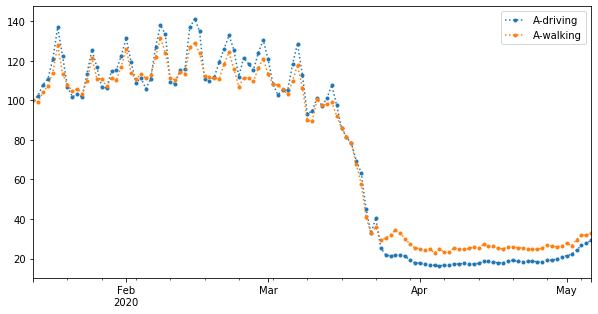

In [3]:
# Set the date as the index, and create a simple plot
apple_mov.index = pd.to_datetime(apple_mov.index,format='%Y-%m-%d')
apple_mov.plot(marker='.', linestyle=':',figsize=(10, 5));

Apple's data is activity based, recording when people were walking and when they were driving. 

We can clearly see a sharp decline in walking / data activity recorded by Apple devices at the end of March. People with a higher income tend to own Apple devices.  This decline is consistent with our hypothesis.

Lastly, we see that in early May, people are starting to drive and walk more.

### Google mobility data

In [4]:
# Read Google mobility data
google_data=[p for p in folder.rglob('Global_*.csv')]
google_mov=pd.read_csv(google_data[-1],low_memory=False)

# Filter down to the region
google_mov=google_mov[google_mov['country_region']=='India'] #Only India
google_mov=google_mov[google_mov['sub_region_1'].isnull()]  #Only national series
google_mov=google_mov[google_mov.columns[4:]]
# Rename the columns
rename={'retail_and_recreation_percent_change_from_baseline':'G-retail',
       'grocery_and_pharmacy_percent_change_from_baseline':'G-grocery',
       'parks_percent_change_from_baseline':'G-parks',
       'transit_stations_percent_change_from_baseline':'G-transit',
       'workplaces_percent_change_from_baseline':'G-workplaces',
       'residential_percent_change_from_baseline':'G-residential'}
google_mov.rename(columns=rename, inplace=True)

# Convert date strings into dates, and set the date as index.
google_mov['date']=google_mov['date'].apply(pd.Timestamp)
google_mov = google_mov.set_index('date')
google_mov.head()


G-retail  G-grocery  G-parks  G-transit  G-workplaces  \
date                                                                
2020-02-15       1.0        2.0      3.0        3.0           5.0   
2020-02-16       2.0        2.0      3.0        2.0           0.0   
2020-02-17      -1.0        1.0      3.0        1.0           4.0   
2020-02-18       0.0        2.0      4.0        2.0           3.0   
2020-02-19       0.0        2.0      1.0        1.0           4.0   

            G-residential  
date                       
2020-02-15            0.0  
2020-02-16            0.0  
2020-02-17            0.0  
2020-02-18            0.0  
2020-02-19            1.0

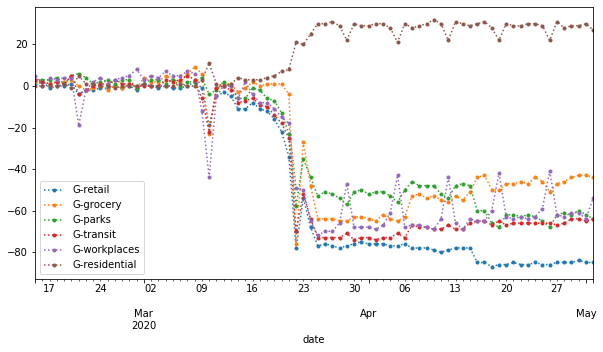

In [5]:
# Show a simple plot
google_mov.plot(marker='.', linestyle=':',figsize=(10, 5));

Google's data is less about activity and more about location.  How much time did people spend in a given location? 

Note the changes after the end of March: 
* An increase in time spent in residential locations (people staying at home)
* An overall decrease in Retail, Grocery, Parks, Transit and Workplaces.

However, once the initial drop happened, we still observe:
* Spikes in Workplaces.  People across a wider diversity of incomes own Android phones.  Based on this chart, there are still a good number of people going back to their workplaces. 
* A drop in trips to retail locations, with a slight incrase in trips to grocery locations.  From this, we can infer that people are decreasing retail spending and saving the money for groceries.

### Comparing Apple and Google Data

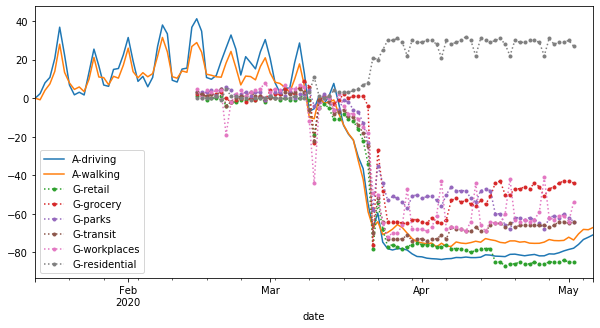

In [6]:
# Create a plot comparing Google and Apple data
ax = (apple_mov-100).plot(figsize=(10, 5))
(google_mov).plot(marker='.',linestyle=':',ax=ax);

Compairing Apple's activity data with Google location data, we make a few more observations:
* An increase in people staying in residential locations is [correctly] correlated with people walking and driving less.  
* The slightly increasing driving and walking rates towards the beginning of may could potentially be related to a slight uptick of trips to the grocery store.  

## Adding in Facebook mobility data

We are going to start with Facebook's new [Movement Range](https://devdatapartnership.herokuapp.com/Facebook.html#Movement-Range-maps) data.  This is not available to the general public, but it is available through the [Data Partnership](https://datapartnership.org/).  Submit a project proposal to use it!

Since this is still an early release, we get the data on `.csv`s

In [8]:
fb_data=folder/'FB-mobility'
csvs=[p for p in fb_data.rglob('CSV*/in_gadm*.csv')]
csvs[-1]

PosixPath('data/mobility/FB-mobility/CSVs20200413/in_gadm_mobility_statistics.20200413.csv')

We convert the data into a Pandas DataFrame.

In [9]:
rename={'all_day_bing_tiles_visited_relative_change':'r_tiles',
        'all_day_ratio_single_tile_users':'r_tile'}

mov=pd.read_csv(csvs[-1])
mov.rename(columns=rename, inplace=True)
mov['ds']=mov['ds'].apply(pd.Timestamp)
mov = mov.set_index('ds')
mov.head()

polygon_id area_type area_code       polygon_name country_code  \
ds                                                                           
2020-04-08        1132      adm1     IN.TG          Telangana           IN   
2020-04-08        1113      adm1     IN.JK  Jammu and Kashmir           IN   
2020-04-12        1132      adm1     IN.TG          Telangana           IN   
2020-04-12        1110      adm1     IN.GJ            Gujarat           IN   
2020-04-12        1102      adm1     IN.AR  Arunachal Pradesh           IN   

             r_tiles    r_tile  
ds                              
2020-04-08 -0.574119  0.141085  
2020-04-08 -0.427373  0.069458  
2020-04-12 -0.557866  0.155335  
2020-04-12 -0.584159  0.107713  
2020-04-12 -0.463551  0.055993

Facebook Movement Range data contains two types of data:

* **Mobility Range**: The degree of movement. How many map tiles were touched by users, relative to a baseline in the last months.

* **Stationary Share**: The percentage of users always on the same map tile, relative to a baseline last months.


Let's explore first the relation between them on a scatter plot:

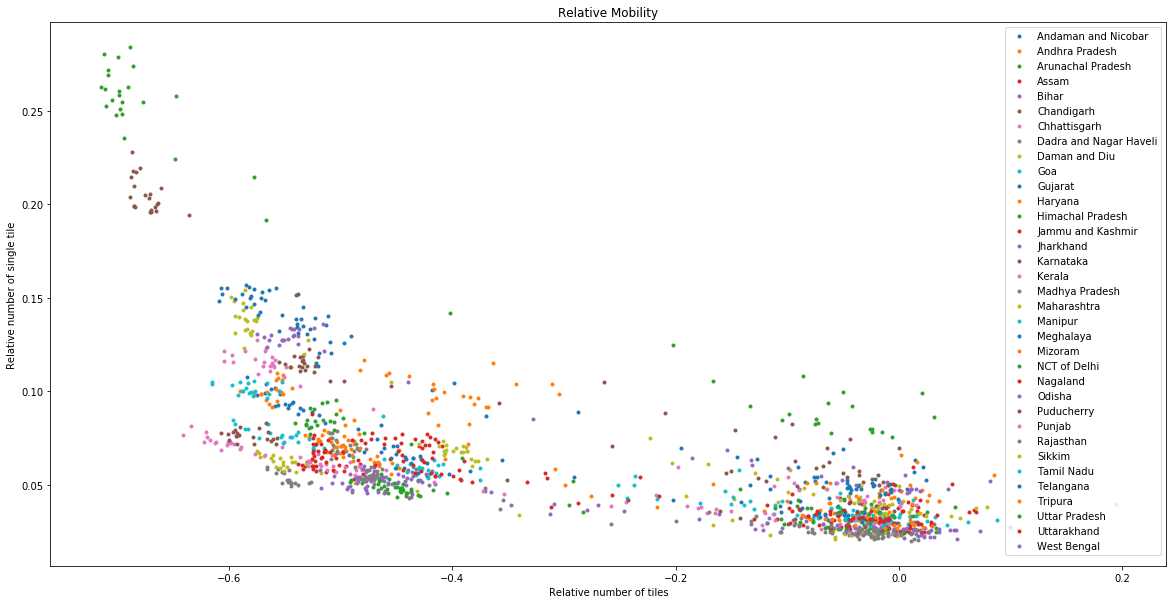

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Group by state
groups = mov.groupby('polygon_name')

# Plot
fig, ax = plt.subplots(figsize=(20, 10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['r_tiles'], group['r_tile'], marker='.', linestyle='', label=name)
    ax.set_xlabel('Relative number of tiles')
    ax.set_ylabel('Relative number of single tile')
    ax.set_title('Relative Mobility')
ax.legend()

plt.show()

It seems clear, and logical, that there is a proportional relation: The more stationary a region is, the less movement range we see. A higher cluster around `0` (no relative change), means that in these regions, there is more variability of stationary populations.

We also see that some regions tend to be in the same space of the plot, especially the most compliant with the lockdown.

---

### Mobility range

This data shows the average number of level 16 Bing tiles (0.6km by 0.6km) that a Facebook user (mobile app + location history) was present in during a 24 hour period compared to pre-crisis levels. This is called the Travel Range map.

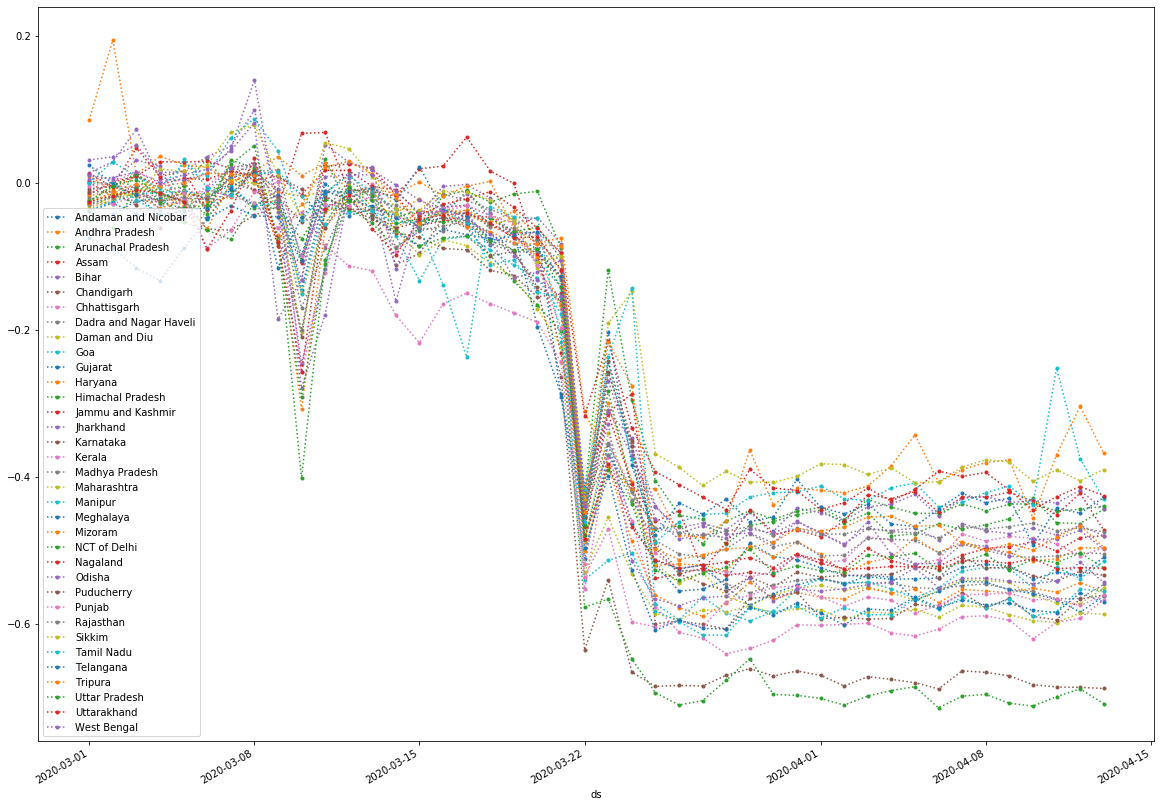

In [11]:
import matplotlib.dates as mdates

ax=mov.groupby('polygon_name')['r_tiles'].plot( marker='.', linestyle=':',figsize=(20, 15));
plt.legend();

ALL regions see a significant decrease in range. The degree of change seems mostly constant, and some places twice than others.

---

### Stationary share

Percentage of Facebook users (mobile app + location history) that were present in only one such level 16 Bing tile in at least 3 different hours of the day. 

In [12]:
# Trick to order by last value
mov.sort_values(by=['r_tile'],ascending=False, inplace=True)

In [13]:
print("The range of value is from %.3f to %.3f"%(mov['r_tile'].min(),mov['r_tile'].max()))

The range of value is from 0.020 to 0.284


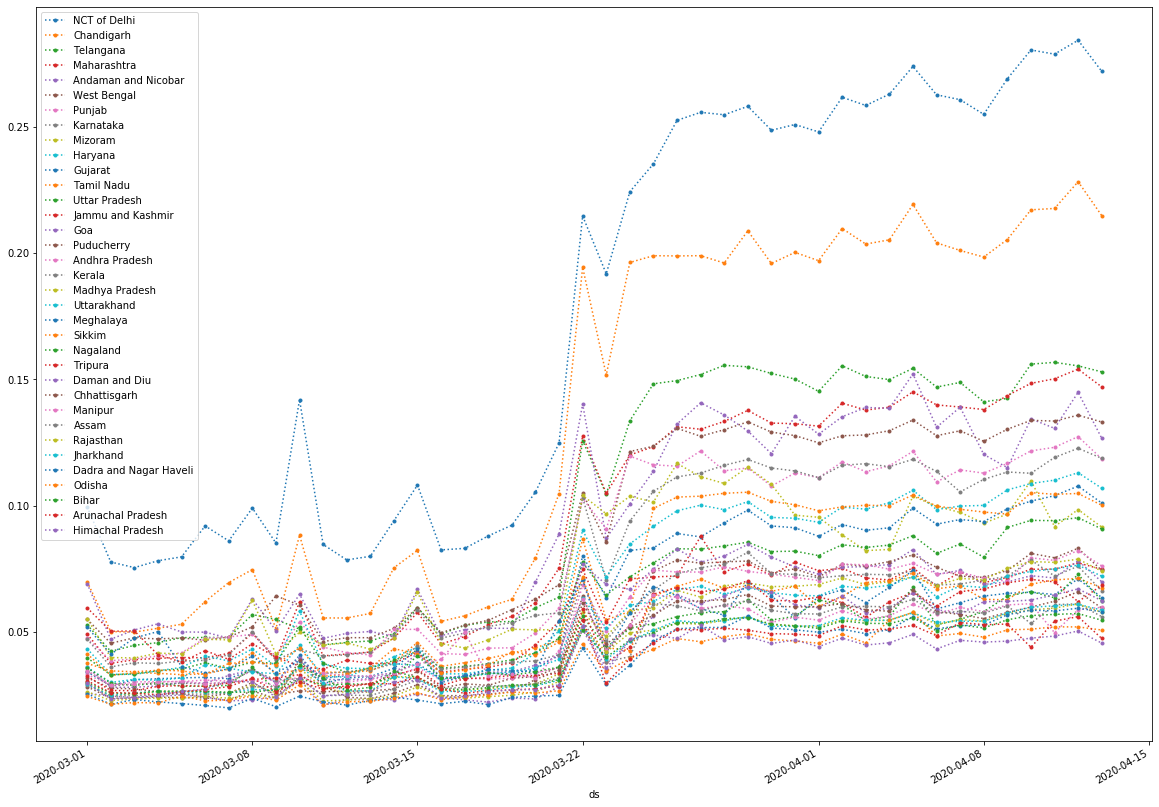

In [14]:
ax=mov.groupby('polygon_name', sort=False)['r_tile'].plot( marker='.', linestyle=':',figsize=(20, 15));
plt.legend()

We see that some regions see little change, while others see `~x15` increase. The capital "NCT of Delhi" is the region with the highest increase of stationay users, while Himachal Pradesh, a remote mountainous region varely saw any change.

---

### Break up by Indian State

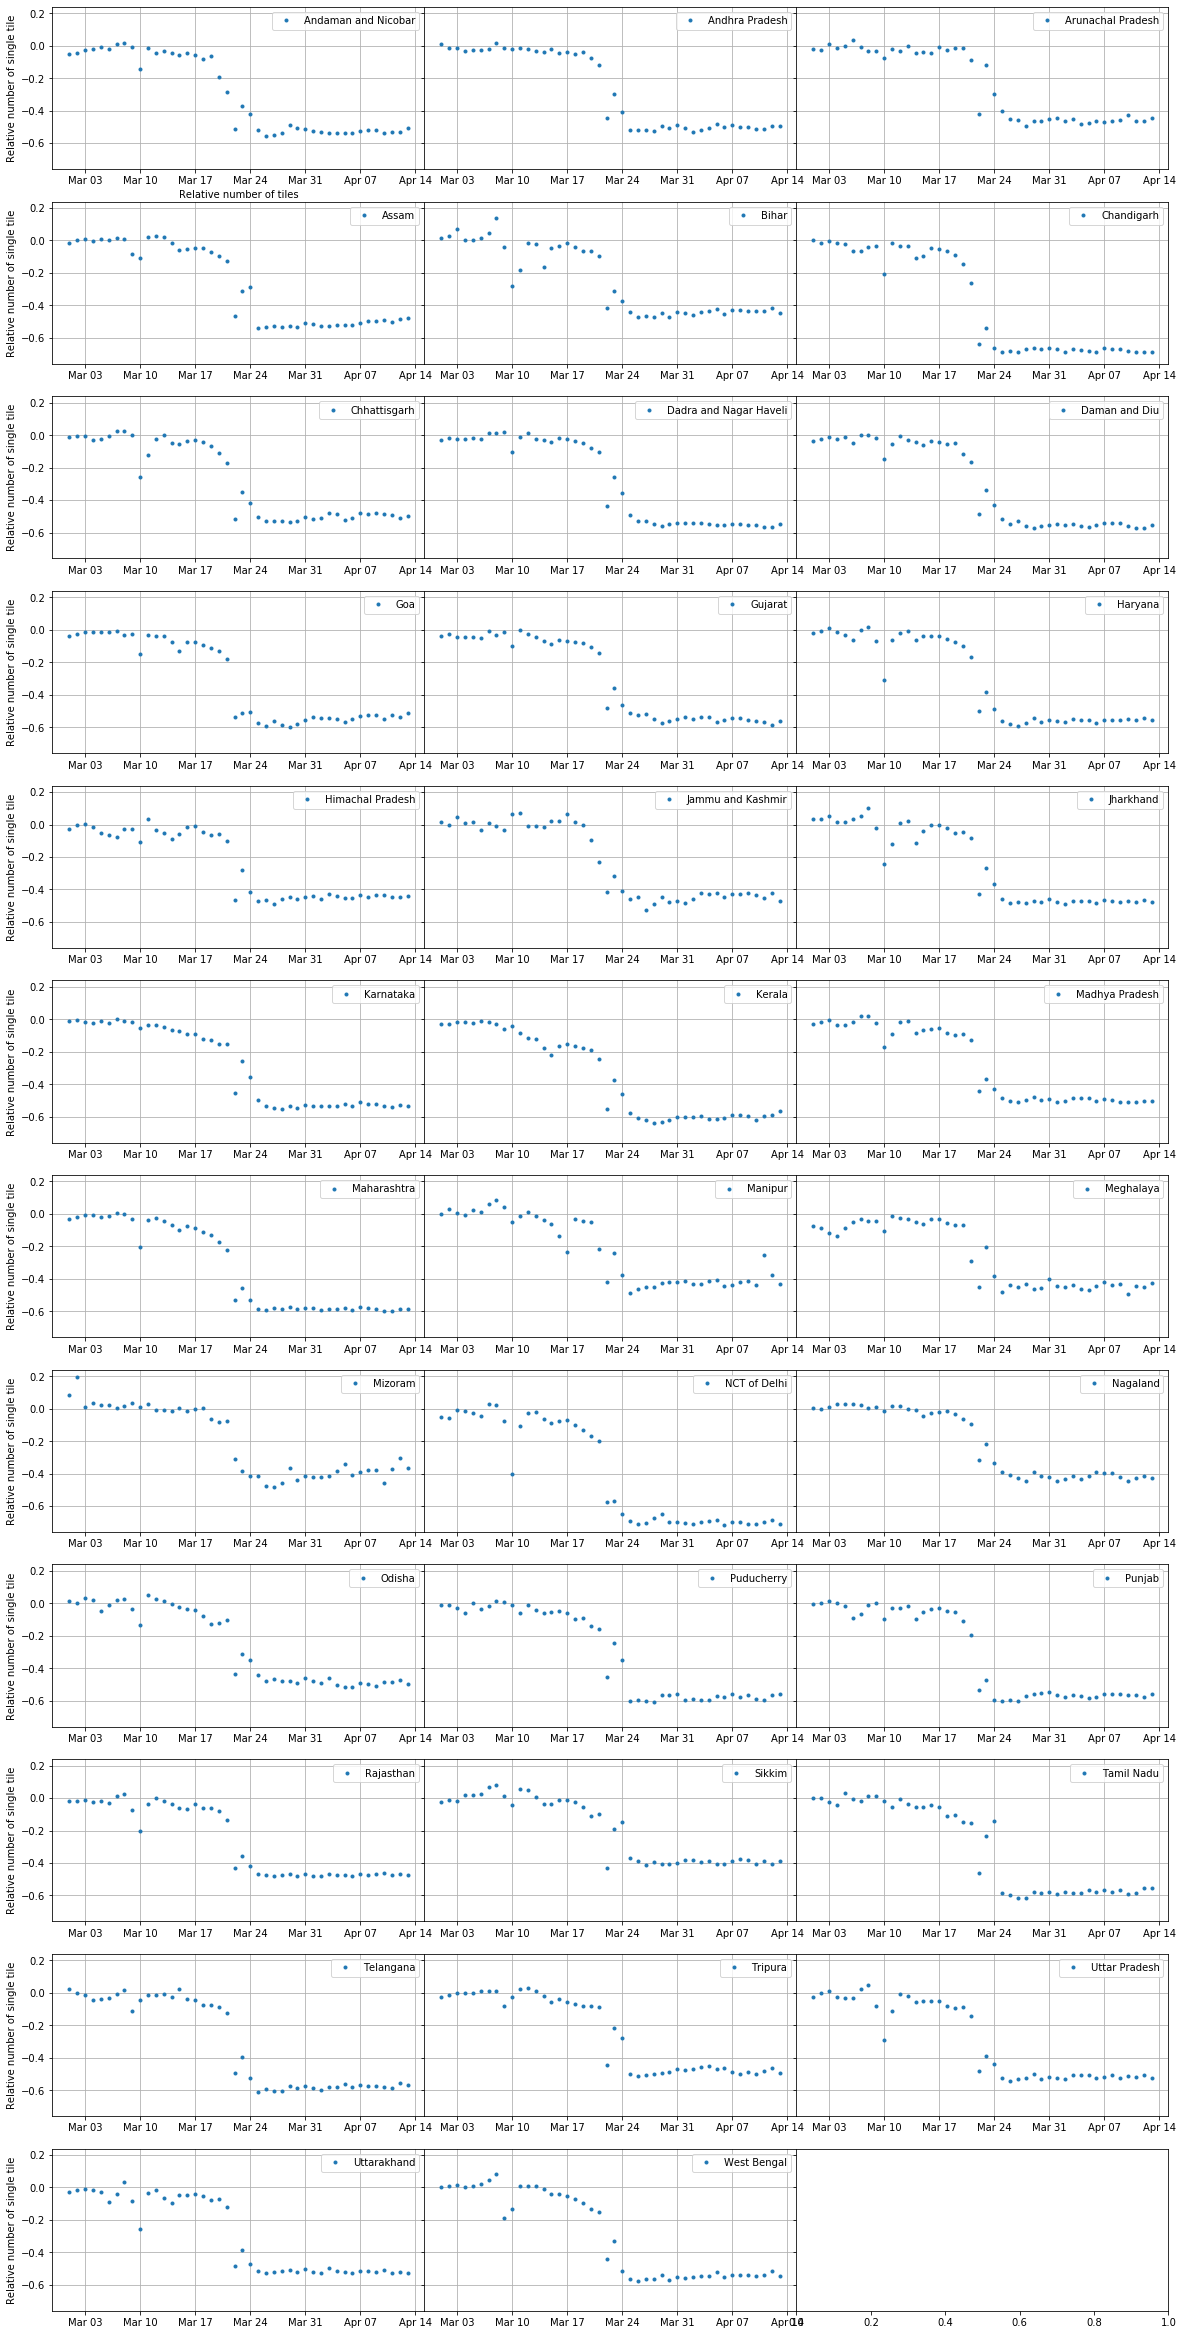

In [15]:
import matplotlib.dates as mdates

groups = mov.groupby('polygon_name')

# Plot
fig, ax = plt.subplots(figsize=(20, 40),nrows=12, ncols=3,sharex=False, sharey=True)
i=0
for name, group in groups:
    row=int(np.floor(i/(ax.shape[1])))
    col=i%(ax.shape[1])
    i=i+1
    #print(i,row,col)
    ax[row,col].plot(group['r_tiles'], marker='.', linestyle='', label=name)
    ax[row,col].margins(0.05)
    ax[0,0].set_xlabel('Relative number of tiles')
    ax[row,0].set_ylabel('Relative number of single tile')
    ax[row,col].xaxis.set_major_locator(mdates.WeekdayLocator())
    ax[row,col].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax[row,col].grid(True)
    ax[row,col].legend()

plt.subplots_adjust(left = 0.125,right = 0.9,bottom = 0.1,top = 0.9,wspace = 0,hspace = 0.2)
plt.show()

## Comparing Apple, Google and Facebook data

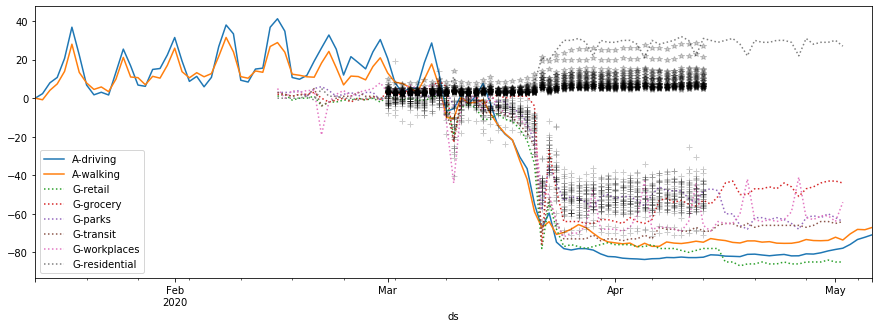

In [35]:
ax = (apple_mov-100).plot(figsize=(15, 5))
(google_mov).plot(marker='',linestyle=':',ax=ax)
(mov*100).groupby('polygon_name')['r_tile'].plot(ax=ax,marker='*', linestyle='',color='black',alpha=0.2);
(mov*100).groupby('polygon_name')['r_tiles'].plot(ax=ax,marker='+', linestyle='',color='black',alpha=0.2);

Apple mobility data (solid colored lines) tend to show among the strongest reduction of mobility, consistent with wealthier customers that can afford Apple products and can also work from home or restrict their mobility. 

Google mobility data (dotted colored lines) breaks down mobility. We can see strongest reduction of mobility in retail and transit, comparable to Apple data. Groceries and workplaces remain with 40% mobility versus the baseline.

Facebook data (black crosses and stars) is broken down into states, and shows a significant range. This is expected as some states are largely rural and some urban, with different livelihoods and mobility patterns.

## Working with RAW mobility data.

What if you have device-level data (e.g. data from `Cuebiq`), but want to aggregate your own metrics, similar to those above?

To do this, we will use real locations of `markets` in Kolkata, India from OSM.  We will simulate device-level data using random points at random times.  

### Getting markets' locations
We start off by getting the market location data from OSM using `amenity=marketplace`. We use [overpass-turbo](https://overpass-turbo.eu/s/TO4) We read the file into `geopandas` and get the centroids of those markets.

In [17]:
import pyproj
pyproj.Proj("+init=epsg:4326")

pyproj.Proj('+units=m +init=epsg:4326', preserve_units=True)

There are 31 markets in the area


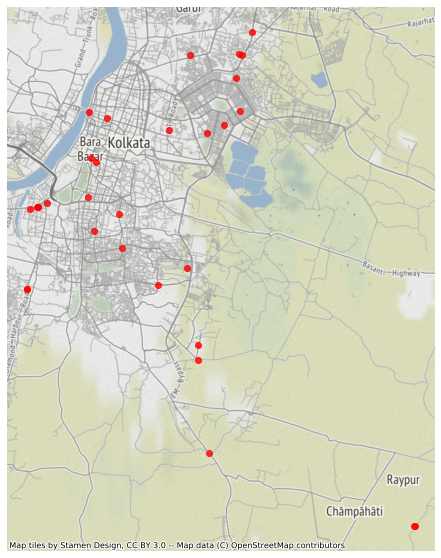

In [18]:
# Get locations of real amenity=marketplace from OSM
import geopandas as gpd
import contextily as ctx
marketplace_file=folder/'Kolkata-marketplace.geojson'

# Read the geojson file and convert it to EGPS3857
markets = gpd.read_file(marketplace_file).to_crs({'init': 'epsg:3857'})

# Convert the geometry to centroids as opposed to polygons. 
markets['geometry'] = markets['geometry'].centroid

# Create a simple plot of the markets
ax = markets.plot(figsize=(10, 10), alpha=0.8,color='red')
ctx.add_basemap(ax)
ax.set_axis_off()
print("There are %i markets in the area"%len(markets))

### Creating a market buffer
We add a buffer of 500m around them so we assign any device-level ping as a visit to the market.

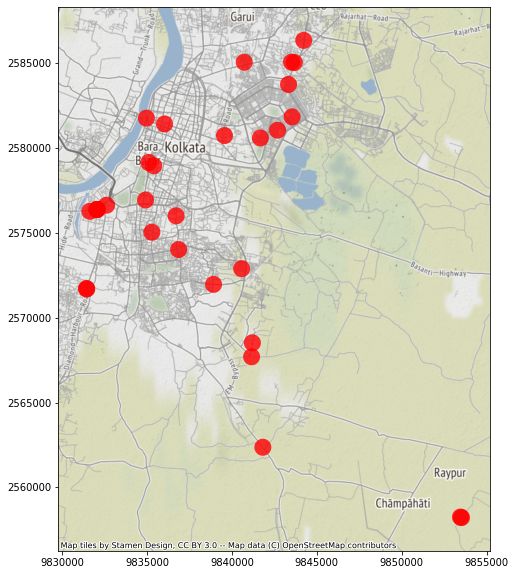

In [19]:
# Add a 500m buffer
markets_zones=markets
markets_zones.geometry=markets.geometry.buffer(500)

# Make a simple plot
ax = markets.plot(figsize=(10, 10), alpha=0.8,color='red')
ctx.add_basemap(ax)

### Creating simulated dates
In order to create simulated data, we need some code to generated simulated dates.  Here we have some code that will generate a random date between a provided interval.

In [20]:
import random
import time

def strTimeProp(start, end, format, prop):
    """Get a time at a proportion of a range of two formatted times.

    start and end should be strings specifying times formated in the
    given format (strftime-style), giving an interval [start, end].
    prop specifies how a proportion of the interval to be taken after
    start.  The returned time will be in the specified format.
    """

    stime = time.mktime(time.strptime(start, format))
    etime = time.mktime(time.strptime(end, format))

    ptime = stime + prop * (etime - stime)

    return time.strftime(format, time.localtime(ptime))


def randomDate(start, end, prop):
    return strTimeProp(start, end, '%d/%m/%Y %I:%M %p', prop)


### Create random pings at random times
Now we are ready to generate synthetic data.  We will generate random pings at random times.  These pings will be limited by a bounding box of all the markets, but each ping does necessarily have to fall into a market.

In [21]:
# Create synthtetic data

import numpy as np
from shapely.geometry import Point

xmin, ymin, xmax,  ymax = markets.total_bounds
num_points = 200000
xc = (xmax - xmin) * np.random.random(num_points) + xmin
yc = (ymax - ymin) * np.random.random(num_points) + ymin
tc = [randomDate("4/1/2020 1:01 AM", "20/4/2020 04:50 AM", random.random()) for i in np.empty(num_points)]
points_geom = gpd.GeoSeries([Point(x, y) for x, y in zip(xc, yc)])
points = gpd.GeoDataFrame(pd.DataFrame({'time':tc}),geometry=points_geom, crs=markets.crs)
points.crs = markets.crs
points.head()

time                         geometry
0  28/02/2020 07:45 PM  POINT (9845269.370 2585592.069)
1  21/02/2020 07:41 PM  POINT (9838860.837 2568362.007)
2  09/02/2020 12:34 PM  POINT (9835194.903 2584734.155)
3  16/01/2020 01:25 AM  POINT (9834310.364 2586797.338)
4  06/03/2020 03:27 AM  POINT (9833397.813 2583220.593)

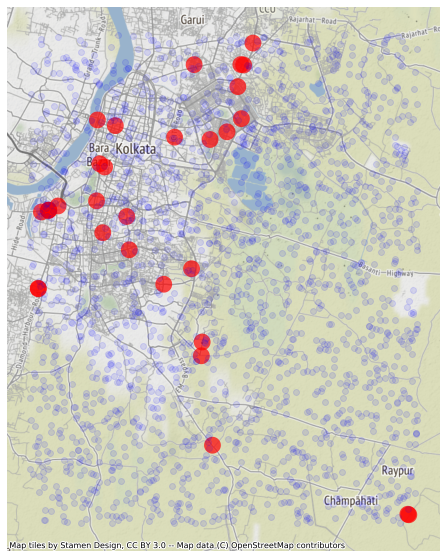

In [22]:
# Create a simple plot of the markets.
ax =  markets.plot(figsize=(10, 10), alpha=.7,color='red')
points.sample(n=int(num_points/100)).plot(ax=ax, alpha=0.1,color='blue')

ctx.add_basemap(ax)
ax.set_axis_off()

### Determine which pings are within a market boundary.
With a Spatial join, we can  filter out any point not intersecting our buffered marketplaces.

In [23]:
inside=gpd.sjoin(points, markets, how='left',)
inside=inside[inside.notnull()['id']]
inside.head()

time                         geometry  index_right  \
9    14/03/2020 03:59 AM  POINT (9853293.100 2558184.783)         20.0   
9    14/03/2020 03:59 AM  POINT (9853293.100 2558184.783)         26.0   
54   12/03/2020 04:23 PM  POINT (9835677.097 2581118.422)         28.0   
116  22/01/2020 02:31 PM  POINT (9831650.417 2576555.681)          2.0   
116  22/01/2020 02:31 PM  POINT (9831650.417 2576555.681)          4.0   

                   id               @id      amenity    building  \
9       way/486526195     way/486526195  marketplace         yes   
9     node/4803445395   node/4803445395  marketplace        None   
54    node/6173706994   node/6173706994  marketplace        None   
116  relation/9907940  relation/9907940  marketplace        None   
116     way/142718051     way/142718051  marketplace  commercial   

             name operator          type  ... addr:postcode  \
9     RABI MARKET     None          None  ...        743363   
9    Nanda Market     None          None  ...        743363   
54           None     None          None  ...          None   
116          None     None  multipolygon  ...          None   
116    Babu Bazar     None          None  ...        700023   

                addr:street leisure alt_name alt_name:short name:en  \
9     Piali-Champahati Road    None     None           None    None   
9    BIPIN CHANDRA PAL ROAD    None     None           None    None   
54                     None    None     None           None    None   
116                    None    None     None           None    None   
116         Bhukaliash Road    None     None           None    None   

    short_name opening_hours designation   description  
9         None          None        None          None  
9         None          None        None          None  
54        None          None        None  fruit market  
116       None          None        None          None  
116       None          None        None          None  

[5 rows x 21 columns]

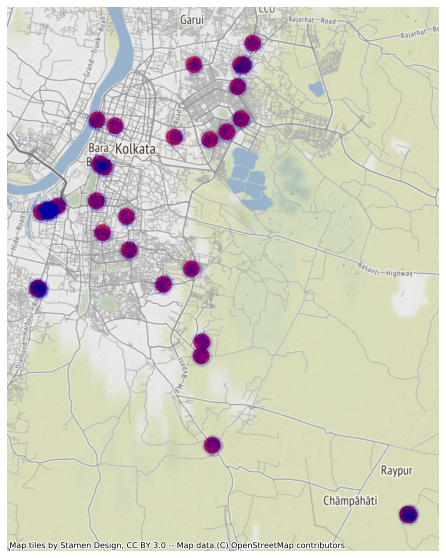

In [24]:
# Create a plot of the points that are inside markets.
ax =  markets.plot(figsize=(10, 10), alpha=.7,color='red')
inside.plot(ax=ax, alpha=0.01,color='blue')

ctx.add_basemap(ax)
ax.set_axis_off()

### Date-Binning of Supermarket Mobility
Now, we need to bin the market mobility by date:

In [25]:
# Make the date string into a datetime 
inside['time'] = pd.to_datetime(inside['time'], format='%d/%m/%Y %I:%M %p')

# Create a day column
inside['day'] = pd.to_datetime(inside['time'], format='%d/%m/%Y').dt.strftime('%m/%d/%Y')
inside.head()

time                         geometry  index_right  \
9   2020-03-14 03:59:00  POINT (9853293.100 2558184.783)         20.0   
9   2020-03-14 03:59:00  POINT (9853293.100 2558184.783)         26.0   
54  2020-03-12 16:23:00  POINT (9835677.097 2581118.422)         28.0   
116 2020-01-22 14:31:00  POINT (9831650.417 2576555.681)          2.0   
116 2020-01-22 14:31:00  POINT (9831650.417 2576555.681)          4.0   

                   id               @id      amenity    building  \
9       way/486526195     way/486526195  marketplace         yes   
9     node/4803445395   node/4803445395  marketplace        None   
54    node/6173706994   node/6173706994  marketplace        None   
116  relation/9907940  relation/9907940  marketplace        None   
116     way/142718051     way/142718051  marketplace  commercial   

             name operator          type  ...             addr:street leisure  \
9     RABI MARKET     None          None  ...   Piali-Champahati Road    None   
9    Nanda Market     None          None  ...  BIPIN CHANDRA PAL ROAD    None   
54           None     None          None  ...                    None    None   
116          None     None  multipolygon  ...                    None    None   
116    Babu Bazar     None          None  ...         Bhukaliash Road    None   

    alt_name alt_name:short name:en short_name opening_hours designation  \
9       None           None    None       None          None        None   
9       None           None    None       None          None        None   
54      None           None    None       None          None        None   
116     None           None    None       None          None        None   
116     None           None    None       None          None        None   

      description         day  
9            None  03/14/2020  
9            None  03/14/2020  
54   fruit market  03/12/2020  
116          None  01/22/2020  
116          None  01/22/2020  

[5 rows x 22 columns]

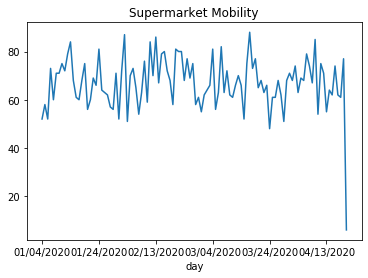

In [26]:
# Create a simple plot showing market mobility in India!
ax = inside.groupby('day').count()['time'].plot()
ax.set_title('Supermarket Mobility');

If you have device level data, such as that provided by the Data Partners in the [Data Partnership](https://datapartnership.org/), you can do this for any type of location in any place of the world.  

Being able to measure mobility this way is a powerful tool for analyzing the impacts of social distancing, and adjusting policies to help prevent the spread of COVID-19.

## Review

In this post, you have learned how to work with [Apple](https://www.apple.com/covid19/mobility), [Google](https://www.google.com/covid19/mobility/), and [Facebook Movement Range](https://devdatapartnership.herokuapp.com/Facebook.html#Movement-Range-maps) data.

We compared the three data sources, and discussed potential bias and its implications in mobility data.  

You learned how to simulate your own device-level data, and how to use your simulated data to calculate movement and attendance in different types of places, anywhere in the world.  

If you are a Development Partner, and would like to use Data Partnership data, submit a project!

If you are a Data Provider and want to see your data be used for world-changing impact, [sign up to work](mailto:datapartnership@worldbank.org) with the Data Partnership!